# K-Nearest Neighbors Classifier
This notebook implements KNN on the breast cancer dataset 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:

df = pd.read_csv("data.csv")

df = df.drop(columns=["id", "Unnamed: 32"])

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"].map({"M": 1, "B": 0}).astype(int)


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


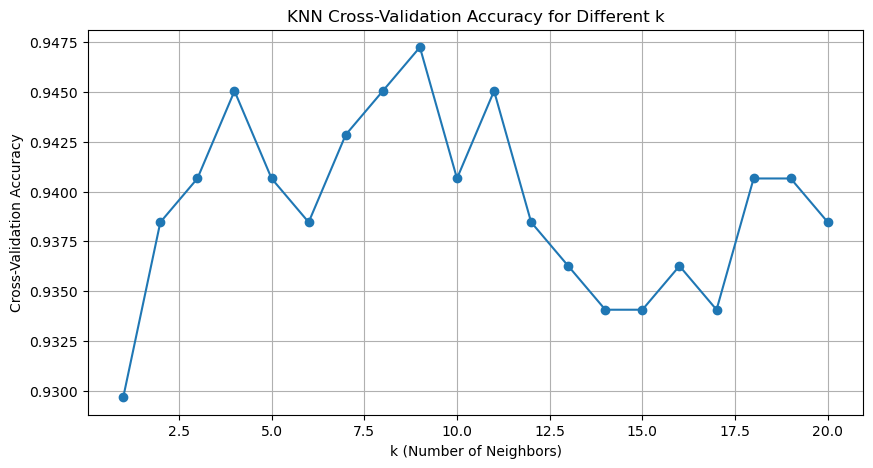

Best k from cross-validation: 9


In [8]:

k_range = range(1, 21)
mean_scores = []

for k in k_range:
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("select", SelectKBest(score_func=f_classif, k=10)),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    mean_scores.append(scores.mean())

# Plotting cross-validation scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, mean_scores, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("KNN Cross-Validation Accuracy for Different k")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(mean_scores)]
print(f"Best k from cross-validation: {best_k}")


Test Accuracy: 0.9561


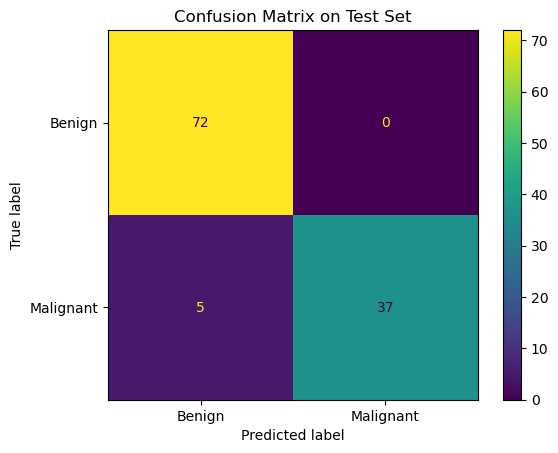

In [10]:

final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("select", SelectKBest(score_func=f_classif, k=10)),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.title("Confusion Matrix on Test Set")
plt.show()
